# Market analysis & sales trend

##  Objective
Conduct sales trend analysis and short-term forecasting for saffron products to identify peak months, top-selling regions, and provide actionable recommendations for inventory and marketing decisions.


Market Analysis & Sales Trend of saffron product

 Author: Janet James
 
 Data: saffron_sales_1000rows.csv
 
 Date: 5-12-2025
 
 Objective: To analyze data and identify key trends


# Import data

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [43]:
import pandas as pd

df = pd.read_csv("saffron_sales_1000rows.csv")
df.head()


,Date,Product,Quantity,Revenue,Region,Customer Type,Cost,Discounts,Profit,Year,Month,MonthName,Quarter
0,2023-01-01,Saffron Threads,3,3571,West,Retail,2194,17,1377,2023,1,Jan,1
1,2023-01-02,Organic Saffron,21,2241,South,Retail,578,5,1663,2023,1,Jan,1
2,2023-01-03,Premium Saffron,36,1194,North,Retail,836,4,358,2023,1,Jan,1
3,2023-01-04,Premium Saffron,41,4818,South,Retail,707,3,4111,2023,1,Jan,1
4,2023-01-05,Organic Saffron,20,914,East,Wholesale,1500,7,-586,2023,1,Jan,1


Data Description
The dataset contains 1,000 rows of saffron sales with the following columns:

- **date** – Transaction date  
- **Product** – Product name  
- **Quantity** – Units sold  
- **Revenue** – Sales amount  
- **Region** – Sales region  
- **Customer Type** – Retail or Wholesale  
- **Cost** – Product cost  
- **Profit** – Revenue minus cost  
- **Month, Year, Quarter** – Derived date features  


# Understand the data

In [44]:
df.describe()

,Quantity,Revenue,Cost,Discounts,Profit,Year,Month,Quarter
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.916000,2751.765000,1594.075000,9.195000,1157.690000,2023.904000,6.100000,2.369000
std,14.101979,1299.250396,793.896026,5.815909,1500.147638,0.790828,3.307407,1.069571
min,1.000000,500.000000,205.000000,0.000000,-2268.000000,2023.000000,1.000000,1.000000
25%,13.000000,1635.250000,918.000000,4.000000,92.000000,2023.000000,3.000000,1.000000
50%,25.000000,2639.500000,1579.000000,9.000000,1235.500000,2024.000000,6.000000,2.000000
75%,37.000000,3832.000000,2293.250000,14.000000,2270.750000,2025.000000,9.000000,3.000000
max,49.000000,4995.000000,2998.000000,19.000000,4726.000000,2025.000000,12.000000,4.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1000 non-null   object
 1   Product        1000 non-null   object
 2   Quantity       1000 non-null   int64 
 3   Revenue        1000 non-null   int64 
 4   Region         1000 non-null   object
 5   Customer Type  1000 non-null   object
 6   Cost           1000 non-null   int64 
 7   Discounts      1000 non-null   int64 
 8   Profit         1000 non-null   int64 
 9   Year           1000 non-null   int64 
 10  Month          1000 non-null   int64 
 11  MonthName      1000 non-null   object
 12  Quarter        1000 non-null   int64 
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


In [46]:
#missing values
df.isnull().sum()



Date             0
Product          0
Quantity         0
Revenue          0
Region           0
Customer Type    0
Cost             0
Discounts        0
Profit           0
Year             0
Month            0
MonthName        0
Quarter          0
dtype: int64

In [47]:
df.columns

Index(['Date', 'Product', 'Quantity', 'Revenue', 'Region', 'Customer Type',
       'Cost', 'Discounts', 'Profit', 'Year', 'Month', 'MonthName', 'Quarter'],
      dtype='object')

In [48]:
df=df.fillna(0)               #missing values

In [49]:
#coverting date columns to datetime:
df['Date'] = pd.to_datetime(df['Date'])


In [50]:
# creating nrdf['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.strftime('%b')
df['Quarter'] = df['Date'].dt.quarter
df['Product'] = df['Product'].str.strip()


##  Data Cleaning
The following cleaning steps were performed:

- Converted the **date** column to datetime format  
- Created new date features (Month, Year, Quarter)
- Stripped whitespace from Product names  
- Checked and handled missing values  
- Exported cleaned dataset for further analysis  


In [51]:
df = df.dropna()             #drop rows


In [52]:
df.to_csv('saffron_sales_1000rows.csv', index=False)


## Exploratory Data Analysis (EDA)
This section explores sales patterns across time, regions, customers, and products.


### Plot: Monthly Revenue
**Observation:**  
Revenue fluctuates across months, showing clear seasonal demand patterns for saffron products.


C:\Users\karthik\AppData\Local\Temp\ipykernel_468\4226758972.py:2: FutureWarning: 'Me' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('Date').resample('Me')['Revenue'].sum()


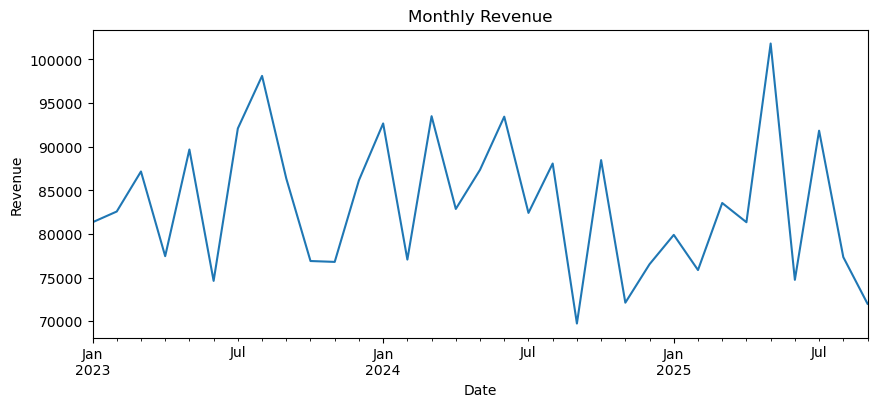

In [53]:
#Monthly trend (plot):
monthly = df.set_index('Date').resample('Me')['Revenue'].sum()
monthly.plot(figsize=(10,4), title='Monthly Revenue')
plt.ylabel('Revenue')
plt.show()


In [54]:
#Total revenue & quantity:
total_rev = df['Revenue'].sum()
total_qty = df['Quantity'].sum()
print("Total revenue:", total_rev)
print("Total quantity:", total_qty)


Total revenue: 2751765
Total quantity: 24916


# Plot: Revenue by Product

Observation:  
Some saffron products contribute significantly more revenue than others, indicating key top-performing items.


In [55]:
#Top products:
df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)


Product
Saffron Powder     746445
Premium Saffron    733678
Organic Saffron    670955
Saffron Threads    600687
Name: Revenue, dtype: int64

### Plot: Revenue by Region
**Observation:**  
Sales volumes differ across regions, showing uneven demand distribution geographically.


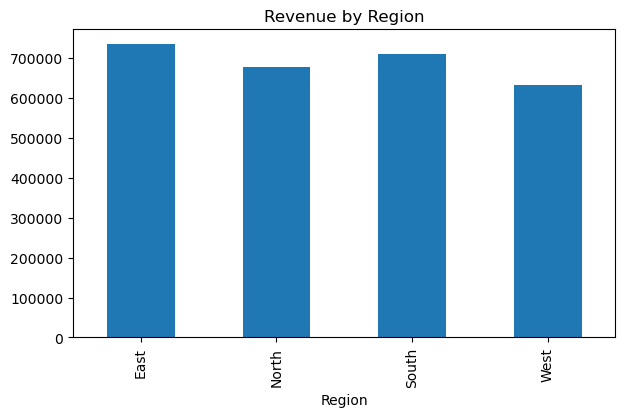

In [56]:
#region share
df.groupby('Region')['Revenue'].sum().plot(kind='bar', figsize=(7,4), title='Revenue by Region')
plt.show()


# Plot: Profit by Customer Type
**Observation:**  Retail customers contribute higher overall profit than wholesale customers due to better margins.


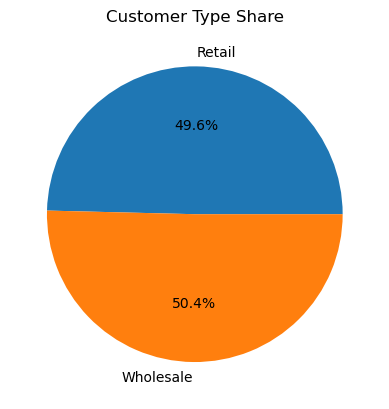

In [57]:
#Customer type share:
df.groupby('Customer Type')['Revenue'].sum().plot(kind='pie', autopct='%1.1f%%', title='Customer Type Share')
plt.ylabel('')
plt.show()


## 5. Forecasting
A simple model was trained to predict high vs low revenue sales using features such as Quantity, Cost, Discounts, and Month.  
Evaluation metrics such as accuracy and confusion matrix were used to assess performance.


C:\Users\karthik\AppData\Local\Temp\ipykernel_468\2665060300.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('Date').resample('M')['Revenue'].sum()
C:\Users\karthik\AppData\Local\Temp\ipykernel_468\2665060300.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = monthly.asfreq('M')  # ensure regular index


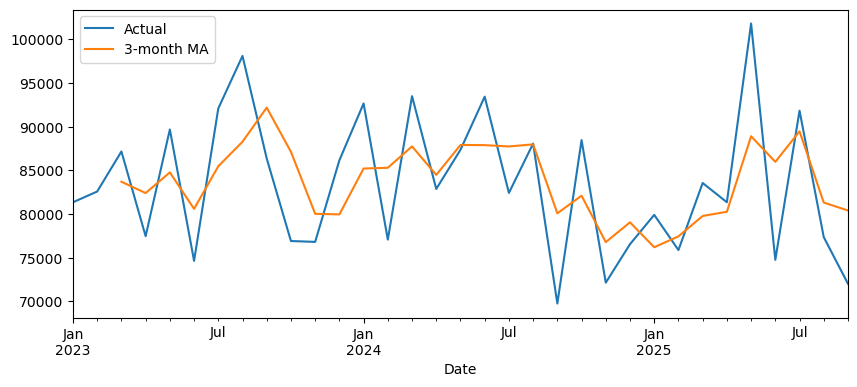

In [58]:
# Simple forecasting (monthly)
monthly = df.set_index('Date').resample('M')['Revenue'].sum()
monthly = monthly.asfreq('M')  # ensure regular index
# moving average
monthly_ma = monthly.rolling(3).mean()
monthly.plot(label='Actual', figsize=(10,4))
monthly_ma.plot(label='3-month MA')
plt.legend()
plt.show()


In [59]:
#Note insights & save visuals
plt.savefig('monthly_revenue.png', dpi=150)

<Figure size 640x480 with 0 Axes>

##  Conclusions & Recommendations

- Sales show monthly seasonality, with certain months performing better.
- Retail customers provide higher profit margins.
- Some products dominate total revenue and should be prioritized.
- Regions vary in sales volume, requiring region-specific strategies.
- Discounts influence customer purchasing behavior and can be optimized.
- Premium saffron products drive the most revenue — consider promotional bundles.
- Increase inventory and marketing activities before festival months .
- Target North and West regions with focused promotions.



# Appendix 

This appendix provides the essential code used throughout the project for data loading, cleaning, analysis, and forecasting. Each code block supports the insights and visualizations presented in the main report.

A. Importing Libraries & Loading Dataset

This section loads all required libraries and imports the saffron sales dataset used for analysis.

B. Data Inspection

We check the structure, data types, missing values, and duplicates to understand the dataset before cleaning.

C. Data Cleaning

Data cleaning includes converting date fields, correcting text columns, removing duplicates, handling missing values, and preparing the dataset for analysis.

D. Product-wise Revenue Analysis

This analysis identifies top-performing products and highlights which saffron variants contribute the most to total revenue.

E. Region-wise Revenue Analysis

This section compares revenue across regions to understand geographical performance and business reach.

F. Monthly Sales Trend

Monthly trends reveal seasonality and demand patterns, especially peaks during festivals and special occasions.

G. Customer Type Revenue Split

Visualizing retail vs wholesale revenue helps understand customer behavior and the primary revenue source.

H. Simple Forecast (Moving Average)

A 3-month moving average provides a basic revenue forecast and smooths fluctuations in the monthly trend.

I. Saving Plots for Report

Plots are saved as image files to be included later in reports, dashboards, or your portfolio.
